Train and test data path

In [ ]:
train_path = '/content/afhq/train'
test_path = '/content/afhq/val'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data Augmentation

In [ ]:
batch_size=32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255 , shear_range=0.2 , zoom_range=0.2 , horizontal_flip=True,vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,target_size=(100,100),class_mode='categorical',batch_size=batch_size)

test_set = test_datagen.flow_from_directory(test_path,target_size=(100,100),class_mode='categorical',batch_size=batch_size)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [ ]:
test_set.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

In [ ]:
train_set.class_indices

{'cat': 0, 'dog': 1, 'wild': 2}

Import required libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input,VGG16
import tensorflow as tf
from tensorflow.keras.models import  Model
from tensorflow.keras.preprocessing import image

Defined pretrained VGG16 model

In [ ]:

vgg = VGG16(include_top=False,weights="imagenet",input_shape=(100,100,3))


Disable hidden layer so that trained layers not train again

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x = Flatten()(vgg.output)

Define output layer

In [ ]:
x = Dense(3, activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=x)

Compile model

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Check model summary

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

Train model and run for 20 epochs

In [ ]:
epochs = 20
history = model.fit(train_set, batch_size=8, 
                    epochs=epochs, 
                    validation_data=test_set,
                    steps_per_epoch=len(train_set),
                    validation_steps=(len(test_set)))

Epoch 1/20
458/458 [==============================] - 98s 213ms/step - loss: 0.3166 - accuracy: 0.8810 - val_loss: 0.1880 - val_accuracy: 0.9287
Epoch 2/20
458/458 [==============================] - 95s 208ms/step - loss: 0.2120 - accuracy: 0.9222 - val_loss: 0.1411 - val_accuracy: 0.9480
Epoch 3/20
458/458 [==============================] - 96s 209ms/step - loss: 0.1802 - accuracy: 0.9336 - val_loss: 0.1356 - val_accuracy: 0.9527
Epoch 4/20
458/458 [==============================] - 95s 208ms/step - loss: 0.1687 - accuracy: 0.9359 - val_loss: 0.1310 - val_accuracy: 0.9500
Epoch 5/20
458/458 [==============================] - 95s 208ms/step - loss: 0.1517 - accuracy: 0.9440 - val_loss: 0.1177 - val_accuracy: 0.9513
Epoch 6/20
458/458 [==============================] - 96s 209ms/step - loss: 0.1495 - accuracy: 0.9459 - val_loss: 0.1203 - val_accuracy: 0.9553
Epoch 7/20
458/458 [==============================] - 96s 209ms/step - loss: 0.1431 - accuracy: 0.9461 - val_loss: 0.1071 - val_ac

Save model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/dog_cat_wild_face_classifier.h5')

In [ ]:
model.save('dog_cat_wild_face_classifier.h5')

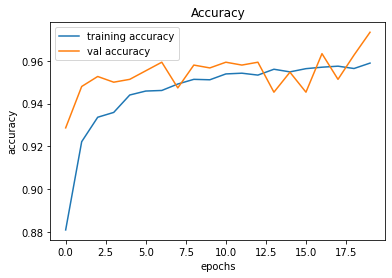

In [ ]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

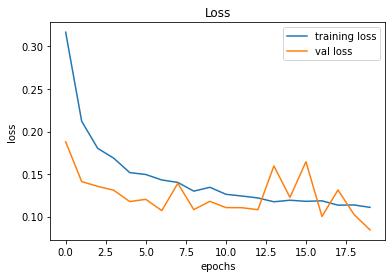

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Evaluate

In [ ]:
score = model.evaluate(test_set)
print('Test accuracy:', score[1])

47/47 [==============================] - 6s 136ms/step - loss: 0.0844 - accuracy: 0.9733
Test accuracy: 0.9733333587646484


Test model

In [ ]:
def test_model(img_path):
  img = image.load_img(img_path,target_size=(100,100))
  
  x1=image.img_to_array(img)
  x1=x1/255
  x1=np.expand_dims(x1,axis=0)
  pred1 = np.argmax(model.predict(x1)[0], axis=-1)
  if pred1==0:
    print('Cat Face')
  elif pred1==1:
    print('Dog Face')
  else:
    print('Wild Animal Face')

In [ ]:
img_path='/content/afhq/val/dog/flickr_dog_000079.jpg'
test_model(img_path)

Dog Face


In [ ]:
img_path='/content/afhq/val/wild/flickr_wild_000039.jpg'
test_model(img_path)

Wild Animal Face
